
# EBI In Silico Systems Biology 2018
# Constrained based modelling of metabolic networks

Paula Jouhten(1, 2), Kiran Patil(2), Karin Sasaki(2), Aleksej Zelezniak(3)

- (1). University of Helsinki, Finland
- (2). EMBL-Heidelberg, Germany
- (3). Chalmers Institute of Technology, Sweden


## In silico design of microbial metabolic networks

To economically produce desired compounds from microbial cell factories it is often necessary to engineer their metabolic networks. Indeed, microorganisms are typically evolved for maximizing growth (or other fitness traits) in their natural habitat and not for over-producing metabolites of human interest. Retrofitting of microbial metabolism has traditionally been done through classical strain improvement that involved random mutagenesis and screening. Such approaches are laborious, unpredictable, and fail to take advantage of the rapidly increasing knowledge of how microorganisms work. Rational engineering of microbial metabolic networks is thus crucial for realizing the potential of synthetic biology. In absence of such methods, the new pathways and functionalities offered by synthetic biology risk to remain below the levels mandated by economic feasibility. Furthermore, rational design of native cellular networks will become an integral part of synthetic biology applications beyond metabolite production – new synthetic circuit must operate in harmony within the context of native networks. Metabolic networks, being relatively well charted from topological as well as mechanistic point of view, offer a good starting point to build our capability to engineer complex networks. 

In this course, we will introduce the basic concepts of metabolic modeling from a synthetic biology perspective. The focus will be on stoichiometric models of metabolism as these can be applied at the scale of genome and with minimal assumptions. We will use the Python package for constrained based modelling, COBRApy.

#### Supplementary reading 
1. Brochado A.R. & Patil K.R. Model-guided identification of gene deletion targets for metabolic engineering in Saccharomyces cerevisiae.  Yeast Metabolic Engineering: Methods and Protocols, Springer, 1152:281-294 (2014).
2. Otero, J.M., Cimini, D., Patil, K.R., Poulsen, S.G., Olsson, L. & Nielsen, J. Industrial Systems Biology of Saccharomyces cerevisiae Enables Novel Succinic Acid Cell Factory. PLoS One 8(1): e54144 (2013).
3. Patil K. R., Rocha I., Forster J. & Nielsen J. Evolutionary programming as a platform for in silico metabolic engineering. BMC Bioinformatics. 6, 308 (2005).
4. Orth JD, Thiele I, Palsson BO. What is flux balance analysis? Nat Biotechnol 28(3):245–248 (2010).
5. I Borodina, J Nielsen. Advances in metabolic engineering of yeast Saccharomyces cerevisiae for production of chemicals. Biotechnology journal (9) 609-20 (2014).
6. Aung HW, Henry SA, Walker LP. Revising the Representation of Fatty Acid, Glycerolipid, and Glycerophospholipid Metabolism in the Consensus Model of Yeast Metabolism. Ind Biotechnol (New Rochelle N Y). 9:215-228 (2013).
7. Förster J, Famili I, Fu P, Palsson BØ, Nielsen J. Genome-scale reconstruction of the Saccharomyces cerevisiae metabolic network. Genome Res. 13:244-53 (2003).
8. Brochado A.R., Matos C., Møller B. L., Hansen J., Mortensen U.H. Patil K.R. Improved vanillin production in baker's yeast through in silico design. Microbial Cell Factories (2010). 

#### Useful links

Install COBRApy: https://github.com/opencobra/cobrapy

Getting started with COBRApy: http://cobrapy.readthedocs.io/en/latest/getting_started.html

Introduction to programming with Python: https://github.com/tobyhodges/ITPP

An introduction to Numpy: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

Data analysis in Python with Pandas: http://pandas.pydata.org/


## Introduction to stoichiometric models

Cellular metabolic networks are highly complex and involve hundreds of enzymes and metabolites. Together, enzymes synthesize building blocks of life (DNA, proteins, lipids etc.) and ensure thermodynamically favorable environment for growth and maintenance.

The state of any metabolic network is largely defined by the **fluxes** through different reactions, i.e. the rates of corresponding enzymatic reactions. These reaction rates are dependent on various parameters in a highly non-linear fashion. 

It is, however, possible to simulate many networks of interest by using a **linear system of equations**: Since chemical compounds react in a fixed stoichiometry, one can write flux balance for each metabolite by using *law of conservation of mass*. Usually, mass balance equation is written only for the intracellular metabolites (i.e. metabolites present inside the cells). Thus, the cell wall defines the boundary of our system.

### Example 1

An example of simple network with 3 fluxes and 1 metabolite is shown below.

![alt text](1.png)

The mass balance equation (i.e. ‘what comes in must go out’) for this example is:  
```
f1 + f2 = f3 
or 
f1 + f2 – f3 = 0
```

### Example 2 - Relevant Python commands

Consider a metabolic network depicted in the following picture (see also the stoichiometric equations for the each reactions below), with 
```
f1 = 1 
f3 = 0.5
```

![alt text](2.png)

#### Stoichiometric equations:
1.	Reaction 1: ``` M1 = 0```
2.	Reaction 2: ```-M1 + 0.5 M2 + 0.5 M3 = 0```
3.	Reaction 3: ```–M2 = 0```
4.	Reaction 4: ```-M2 = 0```
5.	Reaction 5:	```–M3 = 0```


#### Stoichiometric matrix:

Number of rows = number of metabolites

Number of columns = number of reactions

![alt text](3.png)

This matrix is referred to as stoichiometric matrix and an element of this matrix is called stoichiometric coefficient. 

#### Creating a matrix with python:

First of all, we need to import the numpy module:

In [1]:
import numpy as np

There are multiple ways of creating a matrix in Python. For small matrix as in the above example, easiest way is either to type-in the matrix, as shown below. Another way would be to create the matrix in excel or a text file and import it, using the command ```numpy.loadtxt```.

In [2]:
# Stoichiometric matrix
S = np.array([[1, -1, 0, 0, 0],
              [0, 0.5, -1, -1, 0],
              [0, 0.5, 0, 0, -1]
             ])
print('S = ')
print(S)
print('Dimensions of S:')
print(np.shape(S))
print('Three rows and five colums - three metabolites and five reactions.')

S = 
[[ 1.  -1.   0.   0.   0. ]
 [ 0.   0.5 -1.  -1.   0. ]
 [ 0.   0.5  0.   0.  -1. ]]
Dimensions of S:
(3, 5)
Three rows and five colums - three metabolites and five reactions.


#### How many flux measurements we will need in order to have a completely determined system?

Rank of the above stoichiometric matrix is:

In [3]:
print('Rank of S')
print(np.linalg.matrix_rank(S))

Rank of S
3


...hence we will need 2 (= 5 variables – 3 equations) measurements in order to solve the equations. 

Let’s assume that we are given f1 = 1 and f3 = 0.5. 

We can then write the following set of equations where only variables left are f2, f4 and f5.

1.	Mass balance equation for M1: ```f1 = f2``` or ```f1 – f2 = 0``` implies ```f2 = 1```
2.	Mass balance equation for M2: ```0.5f2 = f3 + f4``` or ```0.5f2 – f3 – f4``` implies ```0.5 f2 – f4 = 0.5```
3.	Mass balance equation for M3: ```0.5f2 = f5``` or ```0.5f2 – f5 = 0```

Note that the mass balance for each metabolite contains corresponding stoichiometric coefficient, e.g. 0.5 is stoichiometric coefficient of M2 in reaction 2 (corresponding to f2).

So, we have the following linear system (```A.f = b```):

![alt text](4.png)

This particular example can be solved manually, and you would get ```f2 = 1, f4 = 0``` and  ```f5 = 0.5```. Using Python, you can use ```numpy.linalg.solve``` to solve a linear set of equations and find the solutions to ```f2, f4``` and ```f5```, as below:

In [4]:
# Define A and b as above
A = np.array([[1, 0, 0],
             [0.5, -1, 0],
             [0.5, 0, -1]])
b = np.array([1, 0.5, 0])
print('A=')
print(A)
print('b=')
print(b)

# Solve set of linear equations
f = np.linalg.solve(A, b)
print 'f2=',f[0]
print 'f4=',f[1]
print 'f5=',f[2]

A=
[[ 1.   0.   0. ]
 [ 0.5 -1.   0. ]
 [ 0.5  0.  -1. ]]
b=
[1.  0.5 0. ]
f2= 1.0
f4= -0.0
f5= 0.5


## Exercise 1 - The diet problem

Suppose that the only food items available to buy are potatoes and chicken. The decision about how much of each food to buy is to be made entirely on dietary and economic considerations. We have the nutritional and cost information in the following table:

![alt text](5.png)

The problem is to find a diet (a choice of the numbers of units of the two foods) that meets all minimum nutritional requirements at minimal cost. Formulate the problem as a linear programming problem (LPP). Do the calculations by using graphical method (by hand) and verify your results by using the function ```scipy.optimize.linprog```.

Note: Do not forget to import scipy!

### Solution

The given optimization problem can be stated as follows:

![alt text](6.png)

where ```x```is the number of potato units and ```y```is the number of chicken units.

*Graphical method:*

The feasible region and the corner points corresponding with the given constraints are shown in the following figure. Since the problem is that of linear programming, the optimal solution can be found at one of the corner points. In this case, we find that the optimal solution lies at the corner point ```(4, 1)``` with optimal ```cost = 150```.

![alt text](7.png)

*With Python using scipy.optimize.linprog:*

(See the online documentation of ```scipy``` for the details of the usage syntax of the function). 

We have a minimization problem with inequality constraints. Since ```scipy.optimize.linprog``` is expecting ```<=``` type of inequality constraints, we will multiply the coefficient matrix and b vector by -1 in order to convert our ```>=``` constraints to ```<=```.

In [5]:
f = np.array([25, 50])
A = np.array([[3, 1],
             [4, 3],
             [1, 3]])
b = np.array([8, 19, 7])
print('f=')
print(f)
print('Dimensions of f:')
print(np.shape(f))
print('A=')
print(A)
print('Dimensions of A:')
print(np.shape(A))
print('b=')
print(b)

import scipy as sp
from scipy import optimize

sln = sp.optimize.linprog(f, -A, -b)
print('sln=')
print('Note: fun is the f evaluated at x.')
print(sln)

f=
[25 50]
Dimensions of f:
(2,)
A=
[[3 1]
 [4 3]
 [1 3]]
Dimensions of A:
(3, 2)
b=
[ 8 19  7]
sln=
Note: fun is the f evaluated at x.
     fun: 150.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([5., 0., 0.])
  status: 0
 success: True
       x: array([4., 1.])


## Exercise 2 - Optimal distribution

A certain compound ```M``` can enter into yeast cells at the maximum rate of 2. Compound ```M``` can be treated either in cytosol or in mitochondria. Due to transport limitations, ```f2``` can not be higher than 1. Growth advantage for yeast due to ```M``` is given by (```f1 + 10f2```). Determine the optimal value of the objective function and corresponding values of ```f1``` and ```f2```.

![alt text](8.png)


### Solution

*Objective function:* Maximize ```f```
```
f = f1 + 10f2
```

*Constraints:*

```
f1 + f2 <= 2
f2 <= 1
```

The feasible space is shown in the following figure:

![alt text](9.png)

Since both the objective function and constraints are linear, the optimal solution will lie at one of the corners of the feasible region. 

The corner point 
```
f1 = 1, f2 = 1
```
gives the best objective function value, ```(1,1)```, and hence is the solution to the problem.


## Exercise 3 - a simple metabolic network

Following figure shows a toy metabolic network. 

![alt text](10.png)

The network is capable of converting substrate ```S``` into product ```P``` and/or into biomass ```X```. The stoichiometry of each of the reactions in the network is given below.

1.	R1:	```S = 0```
2.	R2: ```- S + A = 0```
3.	R3:	```- S + B = 0```
4.	R4:	```- S + C = 0```
5.	R5:	```- A + D = 0```
6.	R6:	```- B + D = 0```
7.	R7:	```- C + P = 0```
8.	R8:	```- P = 0```
9.	R9:	```- P - D + 2 X = 0```
10.	R10: ```- X = 0```

a. How many fluxes do we need to know values of before we have a completely determined linear equation system?

b. If ```f1 = 1```, ```f2 = 0.25``` and ```f3 = 0.25```, what will be the rate of production of product and biomass (i.e. ```f8``` and ```f10```)?  What will be the effect of changing ```f3``` to zero?

c. If the only available information is ```f1 = 1```, what will be the maximum possible rate of product and biomass formation? (Use linear programming formulation). 

d. Consider the flux distribution obtained in the above sub-question in case of maximization of ```f10```. Is the solution obtained unique? Suggest and implement a method to verify whether the obtained solution is unique.

### Solutions

##### a. 

In [6]:
S = np.array([[1,-1,-1,-1,0,0,0,0,0,0],
             [0,1,0,0,-1,0,0,0,0,0],
             [0,0,1,0,0,-1,0,0,0,0],
             [0,0,0,1,0,0,-1,0,0,0],
             [0,0,0,0,1,1,0,0,-1,0],
             [0,0,0,0,0,0,1,-1,-1,0],
             [0,0,0,0,0,0,0,0,2,-1]])
print('S =')
print(S)

S =
[[ 1 -1 -1 -1  0  0  0  0  0  0]
 [ 0  1  0  0 -1  0  0  0  0  0]
 [ 0  0  1  0  0 -1  0  0  0  0]
 [ 0  0  0  1  0  0 -1  0  0  0]
 [ 0  0  0  0  1  1  0  0 -1  0]
 [ 0  0  0  0  0  0  1 -1 -1  0]
 [ 0  0  0  0  0  0  0  0  2 -1]]


Number of fluxes required to be known = Degrees of freedom 

= Total number of fluxes – rank(S) 

In [7]:
print('rank(S) = ')
print(np.linalg.matrix_rank(S))

rank(S) = 
7


Number of fluxes required to be known = 10 – 7 = 3

#### b.

In [8]:
A = S[:,3:]
print('A =')
print(A)
b = np.dot(-S,np.transpose([1,0.25,0.25,0,0,0,0,0,0,0]))
print('b =')
print(b)
x = np.linalg.solve(A, b)
print('x =')
print x

A =
[[-1  0  0  0  0  0  0]
 [ 0 -1  0  0  0  0  0]
 [ 0  0 -1  0  0  0  0]
 [ 1  0  0 -1  0  0  0]
 [ 0  1  1  0  0 -1  0]
 [ 0  0  0  1 -1 -1  0]
 [ 0  0  0  0  0  2 -1]]
b =
[-0.5  -0.25 -0.25  0.    0.    0.    0.  ]
x =
[ 0.5   0.25  0.25  0.5  -0.    0.5   1.  ]


Hence, ```f8 = 0``` and ```f10 = 1```.

If ```f3 = 0```, we can solve it in the same way as above giving: f```8 = 0.5``` and ```f10 = 0.5```.

#### c.

Maximum biomass = 1

In [9]:
beq = np.zeros((1,7))
print('beq =')
print(beq)
Aeq = S
print('Aeq =')
print(Aeq)
print('Dimensions of Aeq:')
print(np.shape(Aeq))
f = np.array([0,0,0,0,0,0,0,0,0,1])
print('f =')
print(f)
print('Dimensions of f:')
print(np.shape(f))
# LB and UP for each
B_x1 = (1,1)
B_x2 = (0,100)
B_x3 = (0,100)
B_x4 = (0,100)
B_x5 = (0,100)
B_x6 = (0,100)
B_x7 = (0,100)
B_x8 = (0,100)
B_x9 = (0,100)
B_x10 = (0,100)
x = sp.optimize.linprog(-f, A_eq=Aeq, b_eq=beq, bounds=(B_x1, B_x2, B_x3, B_x4, B_x5, B_x6, B_x7, B_x8, B_x9, B_x10))
print('x =')
print(x)

beq =
[[0. 0. 0. 0. 0. 0. 0.]]
Aeq =
[[ 1 -1 -1 -1  0  0  0  0  0  0]
 [ 0  1  0  0 -1  0  0  0  0  0]
 [ 0  0  1  0  0 -1  0  0  0  0]
 [ 0  0  0  1  0  0 -1  0  0  0]
 [ 0  0  0  0  1  1  0  0 -1  0]
 [ 0  0  0  0  0  0  1 -1 -1  0]
 [ 0  0  0  0  0  0  0  0  2 -1]]
Dimensions of Aeq:
(7, 10)
f =
[0 0 0 0 0 0 0 0 0 1]
Dimensions of f:
(10,)
x =
     fun: -1.0
 message: 'Optimization terminated successfully.'
     nit: 10
   slack: array([  0. ,  99.5, 100. ,  99.5,  99.5, 100. ,  99.5, 100. ,  99.5,
        99. ,   0. ])
  status: 0
 success: True
       x: array([1. , 0.5, 0. , 0.5, 0.5, 0. , 0.5, 0. , 0.5, 1. ])


Similarly, Maximum product = 1

#### d.

The solution obtained in the above sub-question for biomass maximization is not unique. This can be seen by considering the fact that any flux split between ```f2``` and ```f3``` will lead to the same solution as long as their sum is constant. One way to detect whether a solution is unique or not is illustrated by the following algorithm.

1. Fix the value of ```f10``` to its optimal value (i.e. in this case 1) by fixing its upper and lower bounds.
2. For each flux, obtain the maximum and minimum value for that flux by using linear programming (two LP problems one of minimization and one maximization).
3. If the maximum and minimum value for any of the fluxes is not equal, it will mean that we will have alternate optimal solution(s) (non-unique flux distribution).

The above algorithm can be implemented in Python by using a *for loop*.

### Exercise 4 - Multiple optima

Illustrate, by using a simple reaction network, that linear programming can give optimal flux distribution under steady state, but there may be multiple solutions.

### Solution

![alt text](12.png)

Linear program does not necessarily provide a unique solution, as many different flux vectors can result into the same (optimal) value of the objective function. For example, the optimal value of flux ```f4``` (which will be equal to ```f1```) can be obtained with many combinations of values for ```f2``` and ```f3```.

## Exercise 5 - Another small reaction model

Central metabolism of an antibiotic producing fungus is shown in a simplified format in the following sketch. 

![alt text](13.png)

Set up a flux balance model for this system by using Python. Assume that the maximum possible rate of substrate uptake (```v1```) is 1. Unless and otherwise stated differently, assume steady state for all intra-cellular metabolites.

i) What is the maximal production rate of Biomass (```X```)? What is the flux distribution in this case?

ii) Is the flux solution obtained in (i) unique? If not, identify at least one more optimal solution.

iii) What are the maximal production rates for the metabolites ```C``` ad ```D```?

iv) Prepare a plot showing the relationship between the maximum biomass formation rate (```v11```) and rate of secretion of D. If D is the product of interest, calculate the maximum productivity (```v11*v5```) that can be achieved by using this organism.

v) Dr. Highthroughput is interested in studying deletion phenotypes of all single gene deletion mutants in this organism. However, due to restrictions on time and money available, he wishes to minimize the number of genes without loosing much information. What set of genes will be your suggestion to him for not to delete? 

### Solution

In [10]:
# stoichiometric matrix
S = np.array([[1,-1,-1,0,0,0,0,0,0,0,0],
             [0,1,0,0,0,0,0,-1,-1,0,0],
             [0,0,1,-1,0,-1,0,0,0,0,0],
             [0,0,0,0,-1,1,-1,0,0,0,0],
             [0,0,0,0,0,0,0,1,0,-1,0],
             [0,0,0,0,0,0,1,0,1,1,-1],
             [-1,0,0,0,0,1,1,1,1,0,0],
             [1,0,0,0,0,-1,-1,-1,-1,0,0]]) # stoichiom matrix
print('S = ')
print(S)
print('A B C D E X ATP ADP as rows, from top to bottom.')
print('V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 as columns, left to right.')

# obj fun with max biomass
f = np.array([0,0,0,0,0,0,0,0,0,0,-1])
print('f =')
print(f)

# bounds
bnds = ((1,1),(0,1000),(0,1000),(0,1000),(0,1000),(0,1000),(0,1000),(0,1000),(0,1000),(0,1000),(0,1000))

# linear programming
Aeq = S
beq = np.array([0,0,0,0,0,0,0,0])
print('Aeq =')
print(Aeq)
print('beq =')
print(beq)

x = sp.optimize.linprog(c=f, A_eq=Aeq, b_eq=beq, bounds=bnds)
print('x =')
print(x)


S = 
[[ 1 -1 -1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0 -1 -1  0  0]
 [ 0  0  1 -1  0 -1  0  0  0  0  0]
 [ 0  0  0  0 -1  1 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 -1  0]
 [ 0  0  0  0  0  0  1  0  1  1 -1]
 [-1  0  0  0  0  1  1  1  1  0  0]
 [ 1  0  0  0  0 -1 -1 -1 -1  0  0]]
A B C D E X ATP ADP as rows, from top to bottom.
V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 as columns, left to right.
f =
[ 0  0  0  0  0  0  0  0  0  0 -1]
Aeq =
[[ 1 -1 -1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0 -1 -1  0  0]
 [ 0  0  1 -1  0 -1  0  0  0  0  0]
 [ 0  0  0  0 -1  1 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 -1  0]
 [ 0  0  0  0  0  0  1  0  1  1 -1]
 [-1  0  0  0  0  1  1  1  1  0  0]
 [ 1  0  0  0  0 -1 -1 -1 -1  0  0]]
beq =
[0 0 0 0 0 0 0 0]
x =
     fun: -1.0
 message: 'Optimization terminated successfully.'
     nit: 10
   slack: array([   0.,  999., 1000., 1000., 1000., 1000., 1000., 1000.,  999.,
       1000.,  999.,    0.])
  status: 0
 success: True
       x: array([1.

#### i)

Flux distribution should be 

| Rxn | vals   |
| --- |:------:|
| V1  | 1      |
| V2  | 1      |
| V3  | 0      |
| V4  | 0      |
| V5  | 0      |
| V6  | 0      |
| V7  | 0      |
| V8  | 0.9883 |
| V9  | 0.0117 |
| V10 | 0.9883 |
| V11 | 1      |     


Note that due to the possibility of existence of multiple-optimal solutions, this flux distribution is not guaranteed to be unique. However, the objective function value is guaranteed to be optimal (=1).

#### ii)

The flux distribution obtained above is not unique as it can be observed from the network diagram that there are multiple ways to synthesize ```X```. To obtain another optimal solution, one can, e.g., set constraints for ```v8``` ```[0,0]``` and solve the new LPP.

| Rxn | vals   |
| --- |:------:|
| V1  | 1      |
| V2  | 1      |
| V3  | 0      |
| V4  | 0      |
| V5  | 0      |
| V6  | 0      |
| V7  | 0      |
| V8  | 0      |
| V9  | 1      |
| V10 | 0      |
| V11 | 1      |     

#### iii)

The maximum production rates for ```C``` and ```D``` are 0.5 and 1, respectively, and can be obtained by maximizing for ```v4``` (C) or ```v5`` (D).

#### iv)

See the chart below. 

![alt text](14.png)

The results are obtained by constraining lower and upper bounds of ```v11``` at different values between 0 and 1 (maximum possible value for ```v11```) and then maximizing for ```v5```. The optimal value for the productivity (0.25) lies at ```v5 = 1```, ```v11 = 0.5```. Also note that ```v5 = 1-v11``` and thus these two fluxes directly compete for the substrate.

#### v)

It may be suggested that the genes corresponding to the essential reactions in the model should not be attempted to be deleted. These essential reactions can be obtained from our FBA model (set lower and upper bounds for a reaction to 0 and then check whether biomass production is zero) and are listed below.

```
v1, v11
```


## Introduction to COBRApy

COBRApy is a Python package for constraint-based modelling of biological networks.

The example below is a short introduction ot COBRApy. Another good source is the cobrapy documentation: 

https://cobrapy.readthedocs.io/en/latest/getting_started.html

### Example 3

To begin with, let's get and load a model. 

We will work with a condensed version of the genome-scale *E. coli* reconstruction, which contains central metabolism reactions. The network contains 62 internal reactions, 14 exchange reactions and a biomass objective function. It can be downloaded from the link below:

http://systemsbiology.ucsd.edu/InSilicoOrganisms/Ecoli/EcoliSBML

Save the file in the working directory.

Next we load it:

In [11]:
# import function to read sbml files
from cobra.io import read_sbml_model

# define model
ecoli_sbml_file = 'Ec_core_flux1.xml'
ecoli_model = read_sbml_model(ecoli_sbml_file)

The reactions, metabolites, and genes are attributes of the model variable, and you can access them using the dot notation as follows: 

In [12]:
# print the number of reactions, metabolites and genes
print(len(ecoli_model.reactions))
print(len(ecoli_model.metabolites))
print(len(ecoli_model.genes))

# print all the reactions
print(ecoli_model.reactions)

77
63
101
[<Reaction ACKr at 0x7f950db5f4d0>, <Reaction ACONT at 0x7f94d90be410>, <Reaction ACt2r at 0x7f950b2db190>, <Reaction ADHEr at 0x7f94ceeaa090>, <Reaction ADK1 at 0x7f94ceeb0310>, <Reaction AKGDH at 0x7f94ceeb03d0>, <Reaction AKGt2r at 0x7f94ceeb0350>, <Reaction ATPM at 0x7f94ceeb0250>, <Reaction ATPS4r at 0x7f94ceeb05d0>, <Reaction Biomass_Ecoli_core_N__w_GAM_ at 0x7f94ceeb02d0>, <Reaction CO2t at 0x7f94ceeb0510>, <Reaction CS at 0x7f94ceeb07d0>, <Reaction CYTBD at 0x7f94ceeb0750>, <Reaction D_LACt2 at 0x7f94ceeb0890>, <Reaction ENO at 0x7f94ceeb08d0>, <Reaction ETOHt2r at 0x7f94ceeb0810>, <Reaction EX_ac_e_ at 0x7f94ceeb0a50>, <Reaction EX_akg_e_ at 0x7f94ceeb0850>, <Reaction EX_co2_e_ at 0x7f94ceeb0f50>, <Reaction EX_etoh_e_ at 0x7f94ceeb0f90>, <Reaction EX_for_e_ at 0x7f94ceeb0f10>, <Reaction EX_fum_e_ at 0x7f94ceeb0dd0>, <Reaction EX_glc_e_ at 0x7f94ceeb0fd0>, <Reaction EX_h2o_e_ at 0x7f94ceeb0e10>, <Reaction EX_h_e_ at 0x7f94cee4a150>, <Reaction EX_lac_D_e_ at 0x7f94cee4

Genes, reactions and metabolites are a special type of list called a DictList. 

In [13]:
print(type(ecoli_model.reactions))

<class 'cobra.core.dictlist.DictList'>


Objects in a DictList can be retrived by index. For example, to get the 30th reaction in the model (at index 29 because of 0-indexing) you would type:

In [14]:
ecoli_model.reactions[29]

Reaction identifier,EX_succ_e_
Name,R_Succinate_exchange
Memory address,0x07f94cee4a310
Stoichiometry,succ_e --> M_Succinate_C4H4O4 -->
GPR,
Lower bound,0.0
Upper bound,999999.0


Items can also be retrived by their id, using the `get_by_id() function`. For example, to get the cytosolic atp metabolite object (the id is “atp_c”), we can do the following:

In [15]:
ecoli_model.metabolites.get_by_id("atp_c")


Metabolite identifier,atp_c
Name,M_ATP_C10H12N5O13P3
Memory address,0x07f94cee972d0
Formula,
Compartment,Cytosol
In 11 reaction(s),"ATPM, PFK, Biomass_Ecoli_core_N__w_GAM_, ACKr, ADK1, PGK, PYK, PPS, PPCK, ATPS4r, SUCOAS"


Users with an interactive shell will be able to tab-complete to list elements inside a list. This is very useful while in an interactive prompt, as you can see the possible actions you can do:

![alt text](16.png)

Now, you can, for example, view the full name of a reaction, or the equation, or the model objective:

In [16]:
# reaction glucose 6-phosphate isomerase, which interconverts glucose 6-phosphate and fructose 6-phosphate
R1 = ecoli_model.reactions.get_by_id("PGI")
print(R1.name)
print(R1.reaction)
print(R1.lower_bound)
print(R1.objective_coefficient)

# cytosolic atp 
atp = ecoli_model.metabolites.get_by_id("atp_c")
print(atp)
print(atp.charge)

# model objective
print(ecoli_model.objective)

R_glucose_6_phosphate_isomerase
g6p_c <=> f6p_c
-999999.0
0
atp_c
-4
Maximize
-1.0*Biomass_Ecoli_core_N__w_GAM__reverse_d9451 + 1.0*Biomass_Ecoli_core_N__w_GAM_


Exploring the methods of each DictList, you can, for example, add a new reaction, etc:

In [17]:
# add a reaction
R1.reaction = "g6p_c --> f6p_c + h_c + green_eggs + ham"


unknown metabolite 'green_eggs' created
unknown metabolite 'ham' created


Simulations using flux balance analysis can be solved using the function `optimize. This will maximize or minimize (maximizing is the default) flux through the objective reactions.

In [18]:
# import library for data analysis
import pandas
pandas.options.display.max_rows = 100

# import model again
# define model
ecoli_sbml_file = 'Ec_core_flux1.xml'
ecoli_model = read_sbml_model(ecoli_sbml_file)

# optimise model
solution = ecoli_model.optimize()

print solution.objective_value
print solution.status

print(ecoli_model.summary())




0.861407412591
optimal
IN FLUXES       OUT FLUXES    OBJECTIVES
--------------  ------------  ----------------------
o2_e     22.3   h2o_e  24.9   Biomass_Ecol...  0.861
glc_D_e  10     co2_e  23.3
pi_e      3.17  h_e     9.11
None


In [19]:
import pandas
pandas.options.display.max_rows = 100

# import model again
# define model
ecoli_sbml_file = 'Ec_core_flux1.xml'
ecoli_model = read_sbml_model(ecoli_sbml_file)

# optimise model
solution = ecoli_model.optimize(objective_sense="maximize")

print solution.objective_value
print solution.status

print(ecoli_model.summary())

0.861407412591
optimal
IN FLUXES       OUT FLUXES    OBJECTIVES
--------------  ------------  ----------------------
o2_e     22.3   h2o_e  24.9   Biomass_Ecol...  0.861
glc_D_e  10     co2_e  23.3
pi_e      3.17  h_e     9.11
None


Note that the solution is stored at ecoli.solution and it has several attributes.

For more examples on using COBRApy, we refert the reader to the COBRApy doc:

https://cobrapy.readthedocs.io/en/latest/getting_started.html



# Exercise 6 - Prediction of growth phenotypes of gene deletion mutants

In this exercise, we will use a genome-scale models (GEM) of yeast metabolism, a robust, well curated, iFF708 (Forster et al. 2003, see Appendix), covering 1379 reactions corresponding to 619 genes and 796 metabolites.

The resulting large linear models can be efficiently solved, thanks to the power of linear programming solvers such as glpk and CPLEX. Here, we will use the cglpk solver accessed via COBRApy.

GEMs allow simulating growth phenotype as they include a linear reaction representing synthesis of new cells. This reaction, often termed growth reaction, combines macromolecular components (DNA, lipids, proteins etc.) and the needed energy and redox cofactors in appropriate proportions (ideally based on experimental data) towards synthesis of new biomass. The model also includes reactions for nutrient uptake and product secretion. When nutrient uptakes are constrained within, say, experimentally determined values, a linear programming problem maximizing growth reaction can predict the expected growth rate (or rather growth yield) of the cell in question. This problem (incl. its many variants) is commonly referred to as flux balance analysis (FBA, see Orth et al. 2010 in the appendix). Simulation of the effects of genetic perturbations is then possible by using the gene-protein-reaction association rules accompanying the model.

1. Using the given yeast model, identify the growth phenotypes of all single gene deletion mutants. Perform this for the iFF708 model on minimal medium under aerobic conditions. Medium conditions are accounted for by appropriately constraining the nutrient uptake reactions). We provide below a function to change the medium conditions. In the exercises below, try to think about and answer the following questions:
    - How many genes are essential for growth? 
    - How does this result compare with experimentally determined phenotypes (you can find these at yeastgenome.org)? 
    - How many reactions in the models are affected by the gene deletions? 
    - How many gene knock outs show decreased fitness (i.e. decreased simulated maximum specific growth rate)? 
    - Plot histograms of ratios of knock out growth rate and wt growth rate, study the results.

2. Repeat the simulations for iFF708 model using aerobic rich (ypd) medium conditions and anaerobic minimal medium conditions. Compare the results from 1. and 2. and discuss their correspondence with your expectations.

3. Same as for genes, one can simulate effect of deletion of whole reaction. Under minimal medium, anaerobic conditions, identify which REACTIONS are essential for ethanol production in yeast.

**Specific functions and models provided:**

*Models in SBML format:* iFF708_COBRA.xml
*Function to set up conditions:* setupConditions

    **Workflow:**

1. Import a library for data analysis, we recommend `pandas`
2. Import the function `read_legacy_sbml` from the `cobra.io` library
3. Import the iFF708 yeast model in SBML format
4. Specify the solver to be cglpk
5. Import the function `single_gene_deletion` from the `cobra.flux_analysis` library, to simulate genes and reactions deletions

    **Ex1.**

6. Set up the simulation conditions (minimal medium, aerobic) using the setupConditions.py function provided.
7. Make sure objective name is set to 'VGRO', i.e. name of biomass reaction in iFF708. Simulate growth under the defined conditions using the `optimize` function, save wild-type growth.  
8. Use single_gene_deletion function for the simulations of gene deletions
9. Use `pandas.DataFrame.from_dict` to make a table of the results of the single gene deletion simulations
    
    **Ex2.**

10. Run setupConditions again to set different growth conditions for the iFF708 model (rich medium, aerobic)
11. Simulate growth under new conditions using the `optimize` function, save wild-type growth.
12. Use single_gene_deletion function for the simulations of gene deletions
13. Use `pandas.DataFrame.from_dict` to make a table of the results of the single gene deletion simulations
14. Compare the results, e.g. how many of essential genes identified in each condition? use 10e-6 as growth cuttof 
15. Compare growth rate of mutants vs wildtype, i.e. how many gene knockouts show decreased fitness (reduced growth)?
16. Optional: for each of conditions plot histogram of mutant vs wiltype ratios, e.g. use `hist` from `matplotlib` library 

    **Ex3.**

17. Maximize ethanol production under minimal, anaerobic condition change the objective to `ETHxtO` (for excretion of ethanol).
18. Use single_reaction_deletion function for the simulations of reaction deletions
19. What are the effects of reaction deletions toward ethanol yield?

In [20]:
# define function to change conditions
def setupConditions(model, medium='ypd', aeration='aerobic'):
    """
    # This function sets up the medium and aeration conditions for the model
    # Inputs: model - model of organism's metabolism
    #         medium - either 'ypd' or 'minimal'
    #         aeration - either 'aerobic' or 'anaerobic' 
    """
        
    R1 = model.reactions.get_by_id('O2xtI') # oxygen uptake
    R2 = model.reactions.get_by_id('NH3xtI') # amonium uptake
    R3 = model.reactions.get_by_id('SLFxtI') # sulphate uptake
    R4 = model.reactions.get_by_id('PIxtI') # phosphate uptake
    R5 = model.reactions.get_by_id('GLCxtI') # glucose uptake
    
    R6 = model.reactions.get_by_id('ALAxtI') # L-alanine uptake
    R7 = model.reactions.get_by_id('ARGxtI') # L-arginine uptake
    R8 = model.reactions.get_by_id('ASPxtI') # L-aspartate uptake
    R9 = model.reactions.get_by_id('CYSxtI') # L-cysteine uptake
    R10 = model.reactions.get_by_id('GLUxtI') # L-glutamate uptake
    R11 = model.reactions.get_by_id('GLYxtI') # glycine uptake
    R12 = model.reactions.get_by_id('HISxtI') # L-histidine uptake
    R13 = model.reactions.get_by_id('ILExtI') # L-isoleucine uptake
    R14 = model.reactions.get_by_id('LEUxtI') # L-leucine uptake
    R15 = model.reactions.get_by_id('LYSxtI') # lysine uptake
    R16 = model.reactions.get_by_id('MMETxtI') # methionine uptake
    R17 = model.reactions.get_by_id('PHExtI') # L-phenylalanine uptake
    R18 = model.reactions.get_by_id('PROxtI') # L-proline uptake
    R19 = model.reactions.get_by_id('SERxtI') # L-serine uptake
    R20 = model.reactions.get_by_id('THRxtI') # L-threonine  uptake
    R21 = model.reactions.get_by_id('TRPxtI') # L-tryptophan uptake
    R22 = model.reactions.get_by_id('TYRxtI') # L-tyrosine uptake
    R23 = model.reactions.get_by_id('VALxtI') # L-valine uptake
    
    R24 = model.reactions.get_by_id('KxtI') # potassium uptake
    R25 = model.reactions.get_by_id('NAxtI') # sodium uptake
    R26 = model.reactions.get_by_id('BTxtI') # biotin uptake
    R27 = model.reactions.get_by_id('CHOxtI') # chlorine uptake
    R28 = model.reactions.get_by_id('RFLAVxtI') # raboflavin uptake
    R29 = model.reactions.get_by_id('THMxtI') # thiamine uptake
    R30 = model.reactions.get_by_id('MIxtI') # myo-inositol uptake
    R31 = model.reactions.get_by_id('DTxtI') # thymidine uptake
    R32 = model.reactions.get_by_id('PNTOxtI') # (R)-panthotenate uptake
    R33 = model.reactions.get_by_id('URAxtI') # uracyl uptake
    
    R34 = model.reactions.get_by_id('ERGOxtI') # ergosterol uptake
    R35 = model.reactions.get_by_id('ZYMSTxtI') # zymosterol uptake
    
    
    #% Set general medium conditions
#model.ub(1192) = 6.3;  %oxygen uptake
#model.ub(1196) = 1000; %ammonium uptake
#model.ub(1176) = 1000; %sulphate uptake
#model.ub(1189) = 1000; %phosphate uptake
#model.ub(1260) = 22.6; %glucose uptake
    
    # set up medium conditions    
    R1.upper_bound = 6.3
    R2.upper_bound = 1000
    R3.upper_bound = 1000
    R4.upper_bound = 1000
    R5.upper_bound = 22.6
    

    # Set specific medium conditions
    if medium == 'ypd':
        R6.upper_bound = 0.519            
        R7.upper_bound = 0.193
        R8.upper_bound = 0.274
        R9.upper_bound = 0.0192
        R10.upper_bound = 0.479
        R11.upper_bound = 0.934
        R12.upper_bound = 0.31
        R13.upper_bound = 0.0952
        R14.upper_bound = 1.66
        R15.upper_bound = 0.167
        R16.upper_bound = 0.0468
        R17.upper_bound = 0.0758
        R18.upper_bound = 0.357
        R19.upper_bound = 0.166
        R20.upper_bound = 0.112
        R21.upper_bound = 0.0207
        R22.upper_bound = 0.0279
        R23.upper_bound = 0.148
        
        R24.upper_bound = 1000
        R25.upper_bound = 1000
        R26.upper_bound = 1000
        R27.upper_bound = 1000
        R28.upper_bound = 1000
        R29.upper_bound = 1000
        R30.upper_bound = 1000
        R31.upper_bound = 1000
        R32.upper_bound = 1000
        R33.upper_bound = 1000
        
    else: #medium == 'minimal'
        R6.upper_bound = 0
        R7.upper_bound = 0
        R8.upper_bound = 0
        R9.upper_bound = 0
        R10.upper_bound = 0
        R11.upper_bound = 0
        R12.upper_bound = 0
        R13.upper_bound = 0
        R14.upper_bound = 0
        R15.upper_bound = 0
        R16.upper_bound = 0
        R17.upper_bound = 0
        R18.upper_bound = 0
        R19.upper_bound = 0
        R20.upper_bound = 0
        R21.upper_bound = 0
        R22.upper_bound = 0
        R23.upper_bound = 0
        
        R24.upper_bound = 1000
        R25.upper_bound = 1000
        R26.upper_bound = 1000
        R27.upper_bound = 1000
        R30.upper_bound = 1000
        R32.upper_bound = 1000
        R33.upper_bound = 1000

    
    # set aeration conditions and in case of anaerobiosis, supplement the medium adequately for growth
    if aeration == 'anaerobic':    
        R1.upper_bound = 0
        R34.upper_bound = 1000
        R35.upper_bound = 1000
        
    return model

Growth rate at aerobic and minimal medium conditions for iFF708_model:
0.726858338052
<class 'pandas.core.frame.DataFrame'>
Growth rate at aerobic and rich media conditions for iFF708_model:
0.803698900515
Number of essential genes in aerobic minimal  medium 91 
Number of essential genes in aerobic rich ypd medium 51 
Percentage of mutants affecting fitness in     aerobic minimal  medium 0.660743134087 
Percentage of mutants affecting fitness in     aerobic rich ypd medium 0.581583198708 


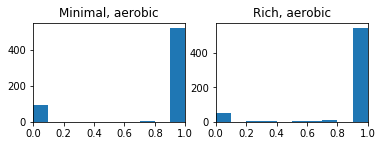

In [21]:
# 1-5 import library for data analysis
import pandas

# import function to read sbml files
from cobra.io import read_legacy_sbml

# define model
iFF708_sbml_file = 'iFF708_COBRA.xml'
iFF708_model = read_legacy_sbml(iFF708_sbml_file)

# import function to simulate genes and reactions deletions
from cobra.flux_analysis import single_gene_deletion, single_reaction_deletion


# 6-9 set up conditions
model_minaer = setupConditions(iFF708_model, medium='minimal', aeration='aerobic')
# set the objective function name
model_minaer.objective = 'VGRO' 

# simulate growth 
solution_minaer = model_minaer.optimize(objective_sense='maximize')
minaer_growth_rate = solution_minaer.objective_value

print('Growth rate at aerobic and minimal medium conditions for iFF708_model:')
print(minaer_growth_rate)

# simulate gene deletions

df_minaer = single_gene_deletion(model_minaer)
print(type(df_minaer))


# 10 - 15 change conditions to rich aerobic
model_richaer = setupConditions(iFF708_model, medium='ypd', aeration='aerobic')

# simulate growth 
solution_richaer = model_richaer.optimize(objective_sense='maximize')

richear_growth_rate = solution_richaer.objective_value

print('Growth rate at aerobic and rich media conditions for iFF708_model:')
print(richear_growth_rate)

# simulate gene deletions
df_richaer = single_gene_deletion(model_richaer)


# how many genes are essential in rich vs minimal media? what is your expectation?
growth_thr = 10e-6 # very small threshold for considering zero in-silico growth, fluxes usually never exact 0!

print('Number of essential genes in aerobic minimal  medium {0} '.format(sum(df_minaer.growth < growth_thr)))
print('Number of essential genes in aerobic rich ypd medium {0} '.format(sum(df_richaer.growth < growth_thr)))

print('Percentage of mutants affecting fitness in \
    aerobic minimal  medium {0} '.format(sum(df_minaer.growth < minaer_growth_rate)/float(len(df_minaer))))
print('Percentage of mutants affecting fitness in \
    aerobic rich ypd medium {0} '.format(sum(df_richaer.growth < richear_growth_rate)/float(len(df_richaer))))

# plotting results 
import matplotlib.pyplot as plt
%matplotlib inline  

plt.figure(1)
plt.subplot(221)
plt.hist(df_minaer.growth/minaer_growth_rate)
plt.xlim([0,1])
plt.title("Minimal, aerobic")

plt.subplot(222)
plt.hist(df_richaer.growth/richear_growth_rate)
plt.xlim([0,1])
plt.title("Rich, aerobic")
plt.show()


In [22]:
# 17-19 Ethanol case study
model_etoh_minaer = setupConditions(iFF708_model, medium='minimal', aeration='anaerobic')

# simulate ethanol production
model_etoh_minaer.objective = 'ETHxtO'
print model_etoh_minaer.objective

solution_etoh_minaer = model_etoh_minaer.optimize(objective_sense='maximize')
ethoh_max = solution_etoh_minaer.objective_value

print('Maximum ethanol production at anaerobic conditions:')
print(ethoh_max)

df_etoh_minaer = single_reaction_deletion(model_etoh_minaer)

#print(df_etoh_minaer.query('objective < {0}'.format(float(ethoh_max))))
      
print('Percentage of reactions affecting ethanol yield in \
    aerobic minimal medium {0}'.format(sum(df_etoh_minaer.growth > ethoh_max)/float(len(df_etoh_minaer))))


Maximize
-1.0*ETHxtO_reverse_e01a2 + 1.0*ETHxtO
Maximum ethanol production at anaerobic conditions:
45.2
Percentage of reactions affecting ethanol yield in     aerobic minimal medium 0.332124728064


# Exercise 7 - Vanillin production in yeast

1. Introduce a heterologous vanillin production pathway (see below, taken from Brochado et al., 2010) in the given yeast model and identify: i) active reactions needed for vanillin production; and ii) maximum theoretical yield of vanillin on glucose (g Vanillin /g Glucose). Use aerobic minimal media conditions for both simulations.

*Vanillin pathway*

#3DSD: 3-Dehydroshikimate -> Protocatechuic acid
#ACAR: Protocatechuic acid + NADPH + ATP -> Protocatechuic aldehyde + NADP+ + AMP + Pyrophosphate
#hsOMT: Protocatechuic aldehyde + S-Adenosyl-L-methionine -> Vanillin + S-Adenosyl-L-homocysteine
#VG: Vanillin + UDPglucose -> Vanillin glucoside + UDP
#secretion
#VGxtO: Vanillin glucoside -> VGxtX

**Workflow:**
1. Set growth conditions
2. Use provided function `inserVanillinPathway` to insert required set of reactions into the model
3. Identify active reactions, use flux variability analysis to find minimal flux bounds
4. Calculate maximum theoretical yield (g Vanillin /g Glucose), remember that glucose uptake rate is set to 22.6 mmol/(g CDW h); also vanillin is secreted as vanillin glucoside

In [23]:
def insertVanillinPathway(model):
    """"
     This function introduces the heterologous vanillin pathway into the yeast model
     Input:  model - cobrapy model of organism's metabolism
     Output: model - in silico engineered cobrapy model with heterologous reactions needed for the production 
     of vanillin
    """
    proto_acid = Metabolite(
        'Protocatechuic_acid_c',
        formula='C7H6O4',
        name='Protocatechuic acid',
        compartment='c')

    proto_aldehyde = Metabolite(
        'Protocatechuic_aldehyde_c',
        formula='C7H6O3',
        name='Protocatechuic aldehyde',
        compartment='c')

    vanillin = Metabolite(
        'Vanillin_c',
        formula='C8H8O3',
        name='Vanillin',
        compartment='c')

    vg_xt = Metabolite(
        'Vanillin_glucoside_e',
        formula='C14H18O8',
        name='Vanillin glucoside',
        compartment='e')

    vanillin_glucoside = Metabolite(
        'Vanillin_glucoside_c',
        formula='C14H18O8',
        name='Vanillin glucoside',
        compartment='c')


    shikimate_c = model.metabolites.get_by_id("m97")
    nadph_c = model.metabolites.get_by_id("m587")
    ATP_c = model.metabolites.get_by_id("m220")
    nadp_plus_c = model.metabolites.get_by_id("m585")
    AMP_c = model.metabolites.get_by_id("m211")
    PP_c = model.metabolites.get_by_id("m688")
    s_adenosyl_met_c = model.metabolites.get_by_id("m707")
    s_adenosyl_hcys_c = model.metabolites.get_by_id("m705")
    udp_glucose_c = model.metabolites.get_by_id("m778")
    udp_c = model.metabolites.get_by_id("m776")

    #3DSD: 3-Dehydroshikimate -> Protocatechuic acid
    #ACAR: Protocatechuic acid + NADPH + ATP -> Protocatechuic aldehyde + NADP+ + AMP + Pyrophosphate
    #hsOMT: Protocatechuic aldehyde + S-Adenosyl-L-methionine -> Vanillin + S-Adenosyl-L-homocysteine 
    #VG: Vanillin + UDPglucose -> Vanillin glucoside + UDP
    #secretion
    #VGxtO: Vanillin glucoside -> VGxtX

    R_3DSD = Reaction("3DSD")
    R_3DSD.add_metabolites({shikimate_c: -1,
                       proto_acid: 1})

    R_ACAR = Reaction("ACAR")
    R_ACAR.add_metabolites({proto_acid: -1,
                            nadph_c:-1,
                            ATP_c: -1,
                            proto_aldehyde: 1,
                            nadp_plus_c: 1,
                            AMP_c: 1,
                            PP_c:1})


    R_hsOMT = Reaction("hcOMT")
    R_hsOMT.add_metabolites({proto_aldehyde: -1,
                             s_adenosyl_met_c: -1,
                             vanillin: 1,
                             s_adenosyl_hcys_c: 1})

    R_VG = Reaction("VG")
    R_VG.add_metabolites({vanillin: -1,
                          udp_glucose_c: -1,
                          vanillin_glucoside: 1,
                          udp_c: 1})            

    R_VGxt = Reaction("VGxt")
    R_VGxt.add_metabolites({vanillin_glucoside:-1,
                             vg_xt:1})

    R_VGxtO = Reaction("VGxtO")
    R_VGxtO.add_metabolites({vg_xt:-1})
    model.add_reactions([R_3DSD, R_ACAR, R_hsOMT, R_VG, R_VGxt, R_VGxtO])
    
    return model

In [24]:
import pandas
from cobra.io import read_legacy_sbml
from cobra.flux_analysis import flux_variability_analysis
from cobra import Metabolite, Reaction, Model

# define model
iFF708_sbml_file = 'iFF708_COBRA.xml'
iFF708_model = read_legacy_sbml(iFF708_sbml_file)


# set up conditions
model = setupConditions(iFF708_model, medium='min', aeration='aerobic')
model = insertVanillinPathway(model)

# change objective function to vanillin glucoside excretion
model.objective = "VGxtO"
solution = model.optimize(objective_sense='maximize')

# perform flux variability analysis to identify reactions that should have a non-zero flux
fva_result = flux_variability_analysis(model, model.reactions[:20])
print(pandas.DataFrame.from_dict(fva_result).T.round(5))



# calculate the yield of vanillin on glucose g Vanillin /g Glucose
# remember that glucose uptake rate is set to 22.6 mmol/(g CDW h)
vanillin_rate = solution.f
vanillin_molar_mass = 152.15 #g·mol−1
glucose_molar_mass = 180.16 #g·mol−1
glucose_uptake = 22.6

vanilla_yield = (vanillin_rate*vanillin_molar_mass)/(glucose_uptake*glucose_molar_mass)
print("Maximum theoretical yeild is {0} g of vanillin per g glucose".format(vanilla_yield))





         GLK1_1  GLK1_2  GLK1_3  HXK1_1  HXK1_2  HXK1_3  HXK1_4  HXK2_1  \
maximum    22.6     0.0     0.0     0.0    22.6     0.0     0.0     0.0   
minimum     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

         HXK2_2  HXK2_3  HXK2_4      PGI1_1      PGI1_2      PGI1_3      PFK2  \
maximum    22.6     0.0     0.0  1000.00000  1000.00000  1000.00000  16.63997   
minimum     0.0     0.0     0.0  -982.65885  -982.65885  -982.65885   0.00000   

           PFK1_1  PFK1_2  PFK1_3      FBA1      TPI1  
maximum  16.63997     0.0     0.0  16.63997  16.63997  
minimum   0.00000     0.0     0.0  16.63997  16.63997  
Maximum theoretical yeild is 0.157212067185 g of vanillin per g glucose
